## Table of Contents

**[1. Introduction](#introduction)**

**[2. Exploring data (Data preprocessing) ](#body1)**

  * [2.1. How many rows, columns are there?](#subbody1)
  * [2.2. What is the meaning of each column?](#subbody2)
  * [2.3. What is the meaning of each row?](#subbody3)
  * [2.4.  Are there any duplicated rows?](#subbody4)
  * [2.5.  What is the current data type of each column, are there columns having inappropriate data types?](#subbody5)
  * [2.6.  Remove meaningless columns](#subbody6)
  * [2.7.  Distribution of numerical attributes](#subbody7)
  * [2.8.  Distribution of categorical attributes](#subbody8)
  
**[3. Ask meaningful questions](#body2)**
  * **Question 1: What percentage of shipping types are selected in different locations?** 
  * **Question 2: How often is size chosen for each gender?**  
  * **Question 3: What is the sales quantity of each category?** 
  * **Question 4: What is the popularity of each category following each season?** 
  * **Question 5: What is the review rating according to the value difference between the current purchase and the previous purchase?**

**[4. Answer questions](#body3)**
  * [**Question 1: What percentage of shipping types are selected in different locations?** ](#subbody4-1)
  * [**Question 2: How often is size chosen for each gender?**  ](#subbody4-2)
  * [**Question 3: What is the sales quantity of each category?** ](#subbody4-3)
  * [**Question 4: What is the popularity of each category following each season?** ](#subbody4-4)
  * [**Question 5: What is the review rating according to the value difference between the current purchase and the previous purchase?** ](#subbody4-5)
  
**[5. Reflection](#body4)**
  * [5.1. Trần Quang An Quốc - 20127304](#subbody4-1)
  * [5.2. Đỗ Đạt Thành - 20127411](#subbody4-2)
  
**[6. References](#reference)**

# 1. Data collection <a name="body1"></a>

Our team selected this topic due to the fundamental role that shopping plays as an essential demand for a diverse range of individuals. Our dataset, titled **"Customer Shopping Trends"**, sourced from Kaggle, is now accessible via the following link:
**[Customer Shopping Trends Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset)**. 
This dataset has been ***artificially crafted using ChatGPT to stimulate a realistic customer shopping experience***. The main goal is to provide a platform for beginners and data enthusiasts, allowing them to create, enjoy, practice, and learn from a dataset that mirrors real-world customer shopping behavior. The aim is to cultivate a culture of learning and experimentation within a simulated environment, promoting a deeper understanding of data analysis and interpretation in the context of consumer preferences and retail scenarios.

The dataset provides a comprehensive view of various features associated with customer shopping preferences, offering vital insights for businesses aiming to elevate their understanding of their customer base. ***Key features include customer age, gender, purchase amount, preferred payment methods, purchase frequency, and feedback ratings***. 

Additionally, data on the type of ***items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included***. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

Despite being artificial intelligence (AI), this data nevertheless has all the relevant information, making it valuable for analyzing market data and providing precise predictions following a thorough understanding. The community uses this dataset to teach analysts, hence it is highly recommended. This confirms the data's dependability. As a result, my team has chosen to use this dataset for practice and application of the knowledge gained, in addition to completing the final project.

# 2. Exploring data (Data preprocessing) <a name="body1"></a>

Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import math

Read data from csv file

In [2]:
df = pd.read_csv('shopping_trends_updated.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Cleaning the columns's names from any spaces

In [4]:
df.columns = df.columns.str.replace(" ", "_")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item_Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase_Amount_(USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review_Rating           3900 non-null   float64
 11  Subscription_Status     3900 non-null   object 
 12  Shipping_Type           3900 non-null   object 
 13  Discount_Applied        3900 non-null   object 
 14  Promo_Code_Used         3900 non-null   

In [6]:
df.describe()

,Customer_ID,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### 2.1 How many rows and how many columns? <a name="subbody1"></a>

In [7]:
print(f'The number of rows is {df.shape[0]}')
print(f'The number of columns is {df.shape[1]}')

The number of rows is 3900
The number of columns is 18


### 2.2. What is the meaning of each column? <a name="subbody2"></a>

| **Column**             | **Description**                                                    |
|:-----------------------|:-------------------------------------------------------------------|
| `Customer ID`          | Unique identifier for each customer                                 |
| `Age`                  | Age of the customer                                                |
| `Gender`               | Gender of the customer (Male/Female)                                |
| `Item Purchased`       | The item purchased by the customer                                 |
| `Category`             | Category of the item purchased                                      |
| `Purchase Amount (USD)`| The amount of the purchase in USD                                   |
| `Location`             | Location where the purchase was made                                |
| `Size`                 | Size of the purchased item                                          |
| `Color`                | Color of the purchased item                                         |
| `Season`               | Season during which the purchase was made                           |
| `Review Rating`        | Rating given by the customer for the purchased item                 |
| `Subscription Status`  | Indicates if the customer has a subscription (Yes/No)               |
| `Shipping Type`        | Type of shipping chosen by the customer                             |
| `Discount Applied`     | Indicates if a discount was applied to the purchase (Yes/No)        |
| `Promo Code Used`      | Indicates if a promo code was used for the purchase (Yes/No)        |
| `Previous Purchases`   | The total count of transactions concluded by the customer at the store, excluding the ongoing transaction |
| `Payment Method`       | Customer's most preferred payment method                            |
| `Frequency of Purchases`| Frequency at which the customer makes purchases (e.g., Weekly, Fotightly, Monthly) |


### 2.3 What is the meaning of each row? <a name="subbody3"></a>

Each sample in the DataFrame df is designed to convey information about individual customer shopping records.

### 2.4 Are there any duplicates? <a name="subbody4"></a>

In [8]:
df.duplicated()
df[df.duplicated()].count()

Customer_ID               0
Age                       0
Gender                    0
Item_Purchased            0
Category                  0
Purchase_Amount_(USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Subscription_Status       0
Shipping_Type             0
Discount_Applied          0
Promo_Code_Used           0
Previous_Purchases        0
Payment_Method            0
Frequency_of_Purchases    0
dtype: int64

### 2.5. What is the current data type of each column, are there columns having inappropriate data types ? <a name="subbody5"></a>

In [9]:
df.dtypes

Customer_ID                 int64
Age                         int64
Gender                     object
Item_Purchased             object
Category                   object
Purchase_Amount_(USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review_Rating             float64
Subscription_Status        object
Shipping_Type              object
Discount_Applied           object
Promo_Code_Used            object
Previous_Purchases          int64
Payment_Method             object
Frequency_of_Purchases     object
dtype: object

### 2.6.  Remove meaningless columns <a name="subbody6"></a>

In [10]:
df["Customer_ID"].duplicated().sum()

0

In [11]:
df["Customer_ID"].unique()

array([   1,    2,    3, ..., 3898, 3899, 3900])

According to ***Customer_ID***, it's a column of unique values for each customer record. So, i think we do not need this column in our analysis. I will drop it. 

In [12]:
df = df.drop(['Customer_ID'], axis=1)
df.columns

Index(['Age', 'Gender', 'Item_Purchased', 'Category', 'Purchase_Amount_(USD)',
       'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Shipping_Type', 'Discount_Applied',
       'Promo_Code_Used', 'Previous_Purchases', 'Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [13]:
check_diff_df_DA_PCU = df[df['Discount_Applied'] != df['Promo_Code_Used']]
print(f'The number of difference between Discount Applied and Promo Code Used is { len(check_diff_df_DA_PCU) }') 

The number of difference between Discount Applied and Promo Code Used is 0


According to above, it's can be seen that ***Discount_Applied*** have the same value with ***Promo_Code_Used***. 

Consequently, we can remove ***Promo_Code_Used*** as when discount is applied it means promotion code is used. 

In [14]:
df = df.drop(['Promo_Code_Used'], axis=1)
df.columns

Index(['Age', 'Gender', 'Item_Purchased', 'Category', 'Purchase_Amount_(USD)',
       'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Shipping_Type', 'Discount_Applied',
       'Previous_Purchases', 'Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

### 2.7. Distribution of numerical attributes <a name="subbody7"></a>

In [15]:
numeric_columns = df.select_dtypes(include=[np.int64, np.float64])
numeric_col_profile = numeric_columns.describe().loc[["min", "25%", "50%", "75%", "max"], :]
numeric_col_profile

,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
min,18.0,20.0,2.5,1.0
25%,31.0,39.0,3.1,13.0
50%,44.0,60.0,3.7,25.0
75%,57.0,81.0,4.4,38.0
max,70.0,100.0,5.0,50.0


Initially, we need to check if there are any outliers in each numerical category. This helps us figure out if we should clean up these values or leave them as they are, as having unusual values can make our dataset messy. Another reason to clean them up is that it makes our charts look better and easier to understand. I use boxplot to define outliers.

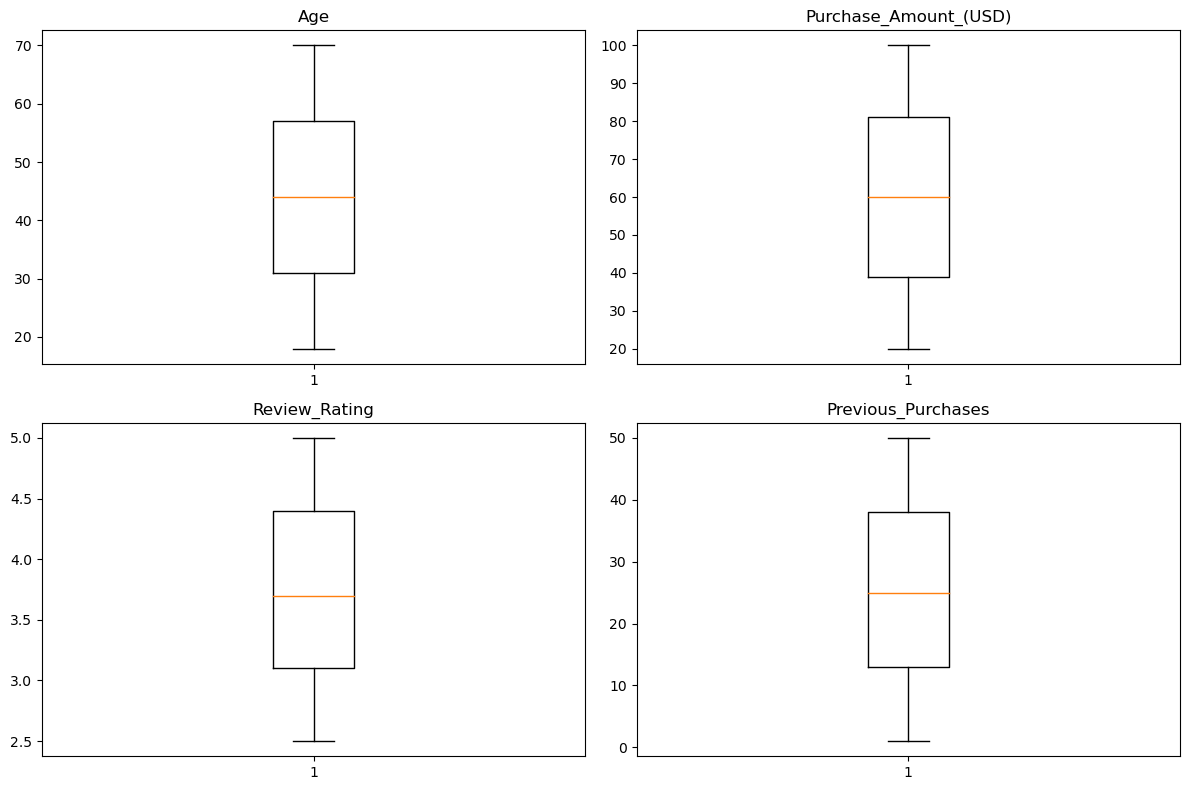

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=np.ceil(len(numeric_columns.columns) / 2).astype(int), figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    axes[i].boxplot(numeric_columns[column])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

There are no outliers that we need to preprocess, now let's visualize these numerical attributes.

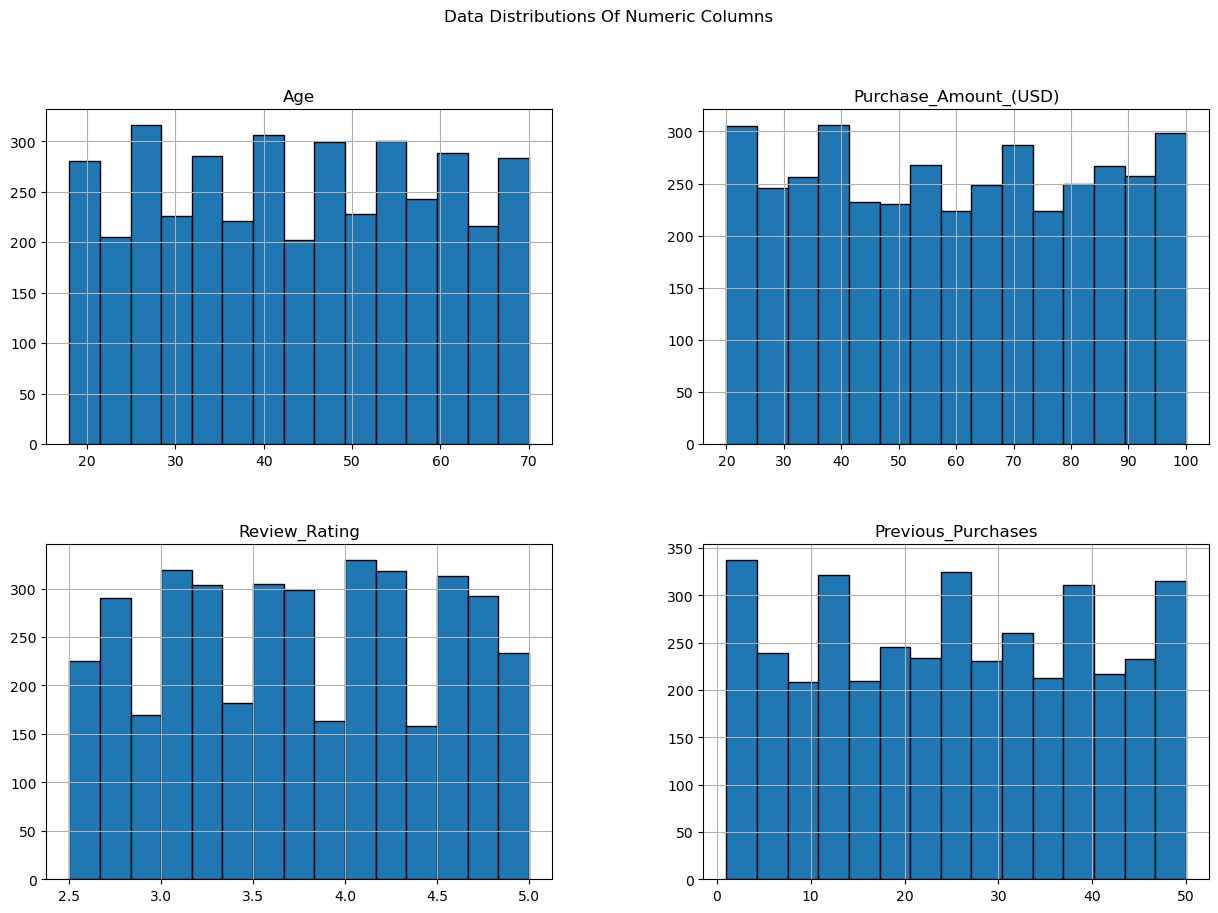

In [17]:
hist = numeric_columns.hist(bins=int(np.ceil(1 + np.log2(len(numeric_columns)))) + 2, figsize=(15, 10), layout=(2, 2), edgecolor='black')
plt.suptitle('Data Distributions Of Numeric Columns')
plt.show()


Based on the distributions described above, it is evident that there is a substantial number of customers falling within the age range of 18 to 70. Ratings appear to be consistent across various levels. Furthermore, there is a notable similarity between the figures for both previous and current purchases.

### 2.8. Distribution of categorical attributes <a name="subbody8"></a>

In [18]:
categorical_df = df.select_dtypes(include='object')
single_cate_profile = categorical_df.agg(lambda my_value: pd.Series([my_value.nunique(), my_value.value_counts().to_dict()], index=["num_diff_vals", "distribution"]))
single_cate_profile

,Gender,Item_Purchased,Category,Location,Size,Color,Season,Subscription_Status,Shipping_Type,Discount_Applied,Payment_Method,Frequency_of_Purchases
num_diff_vals,2,25,4,50,4,25,4,2,6,2,6,7
distribution,"{'Male': 2652, 'Female': 1248}","{'Blouse': 171, 'Jewelry': 171, 'Pants': 171, ...","{'Clothing': 1737, 'Accessories': 1240, 'Footw...","{'Montana': 96, 'California': 95, 'Idaho': 93,...","{'M': 1755, 'L': 1053, 'S': 663, 'XL': 429}","{'Olive': 177, 'Yellow': 174, 'Silver': 173, '...","{'Spring': 999, 'Fall': 975, 'Winter': 971, 'S...","{'No': 2847, 'Yes': 1053}","{'Free Shipping': 675, 'Standard': 654, 'Store...","{'No': 2223, 'Yes': 1677}","{'PayPal': 677, 'Credit Card': 671, 'Cash': 67...","{'Every 3 Months': 584, 'Annually': 572, 'Quar..."


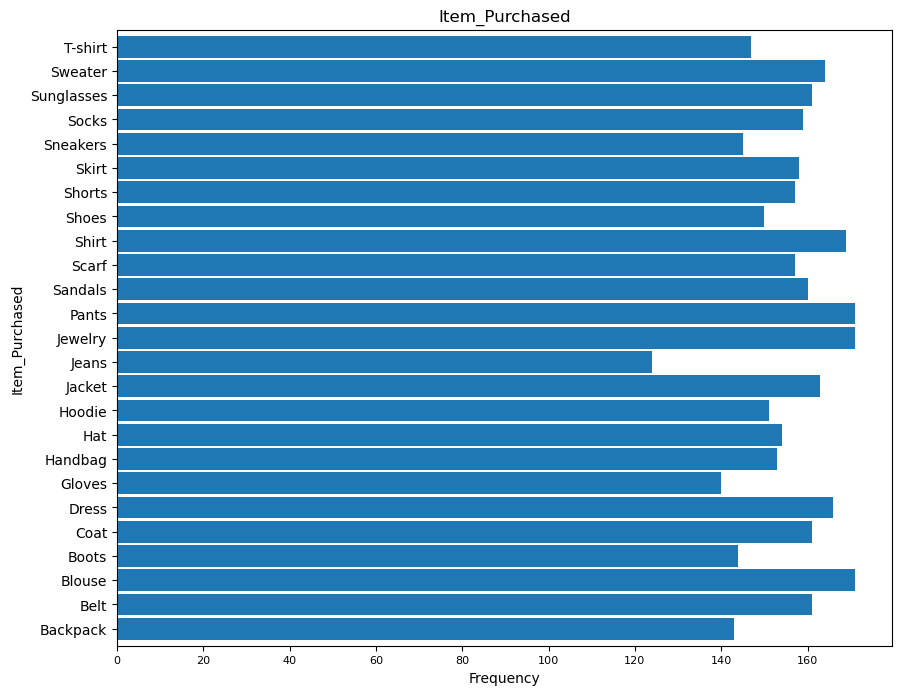

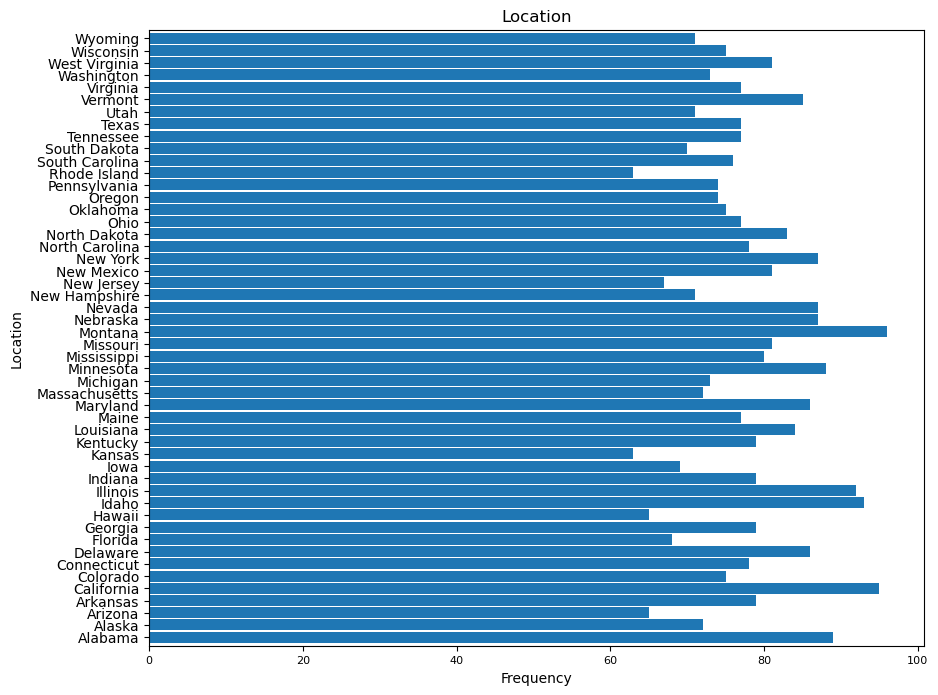

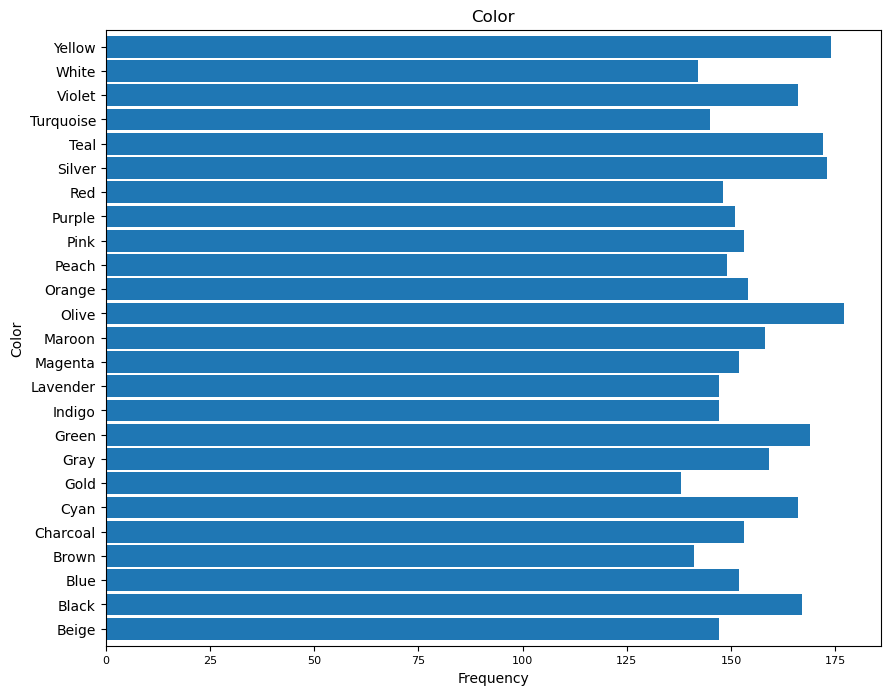

In [19]:
def draw_distribution(data, title):
    plt.figure(figsize=(10, 8))
    data.value_counts().sort_index().plot(kind='barh', width=0.9)
    plt.title(title)
    plt.xticks(fontsize=8)
    plt.xlabel('Frequency', fontsize=10)
    plt.ylabel(title)
    plt.show()

draw_distribution(categorical_df['Item_Purchased'], 'Item_Purchased')
draw_distribution(categorical_df['Location'], 'Location')
draw_distribution(categorical_df['Color'], 'Color')

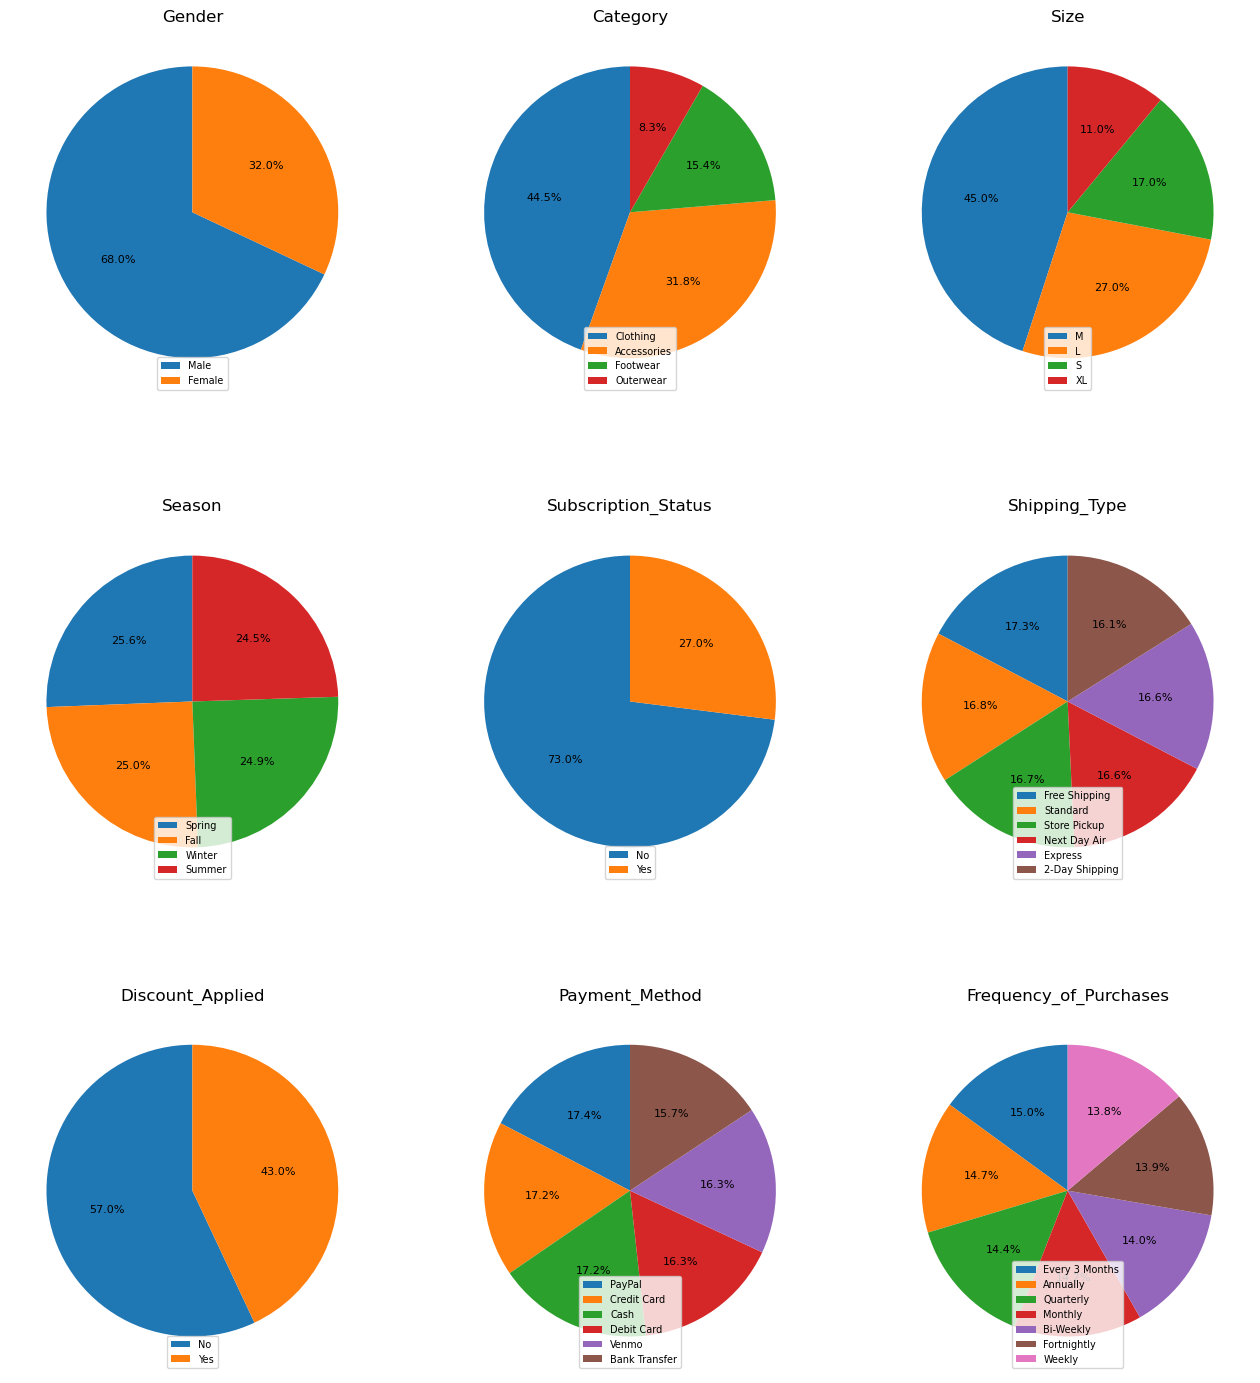

In [20]:
categorical_df = categorical_df.drop(['Item_Purchased', 'Location', 'Color'], axis = 1)
my_fig, my_axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 2 * len(categorical_df.columns)))
my_axes = my_axes.flatten()
for i, column in enumerate(categorical_df):
    distribution_dict = single_cate_profile[column]['distribution']
    labels = distribution_dict.keys()
    sizes = distribution_dict.values()
    
    wedges, texts, autotexts = my_axes[i].pie(sizes, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 8}, radius=1)
    my_axes[i].legend(wedges, labels, loc="lower center", fontsize = 7)
    my_axes[i].set_title(column, fontsize=12)

plt.show()

Based on the distributions described above, there are some useful information we can gain. For example:

- More men engage in shopping compared to women. 
- Clothing stands out as the most frequently purchased item by customers. 
- The majority of customers show little interest in subscriptions. 
- Customers tend to utilize discounts more frequently.

# 3. Ask meaningful questions <a name="body2"></a>

### Question 1: What percentage of shipping types are selected in different locations?** 
### Question 2: How often is size chosen for each gender?**  
### Question 3: What is the sales quantity of each category?** 
### Question 4: What is the popularity of each category following each season?** 
### Question 5: What is the review rating according to the value difference between the current purchase and the previous purchase?

# 4. Answer questions <a name="body3"></a>

### Question 1: What percentage of shipping types are selected in different locations?  <a name="subbody4-1"></a>

The question is posed to survey the ordering methods of different locations. Given the multitude of delivery partners, each with their unique delivery methods, understanding the preference for shipping types across various locations can assist sellers in choosing the right delivery partner for collaboration. This information is crucial for optimizing the delivery process and ensuring customer satisfaction.


To prepare for the chart presentation to answer the above question, we will process the data as follows:
 - Step 1: Group the two columns “Location” and “Shipping_Type”
 - Step 2: Create a layout to display the desired number of charts (here we will present 3 charts per row).
 - Step 3: Represent the data using pie charts.

In [21]:
location_shipping_counts = df.groupby(['Location', 'Shipping_Type']).size().unstack()
location_shipping_counts

Shipping_Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Location,,,,,,
Alabama,16,20,9,17,8,19
Alaska,13,13,14,8,17,7
Arizona,10,12,10,11,10,12
Arkansas,12,16,14,17,11,9
California,14,16,16,20,16,13
Colorado,12,4,13,14,14,18
Connecticut,16,11,6,18,12,15
Delaware,14,14,20,16,9,13
Florida,10,14,17,8,13,6


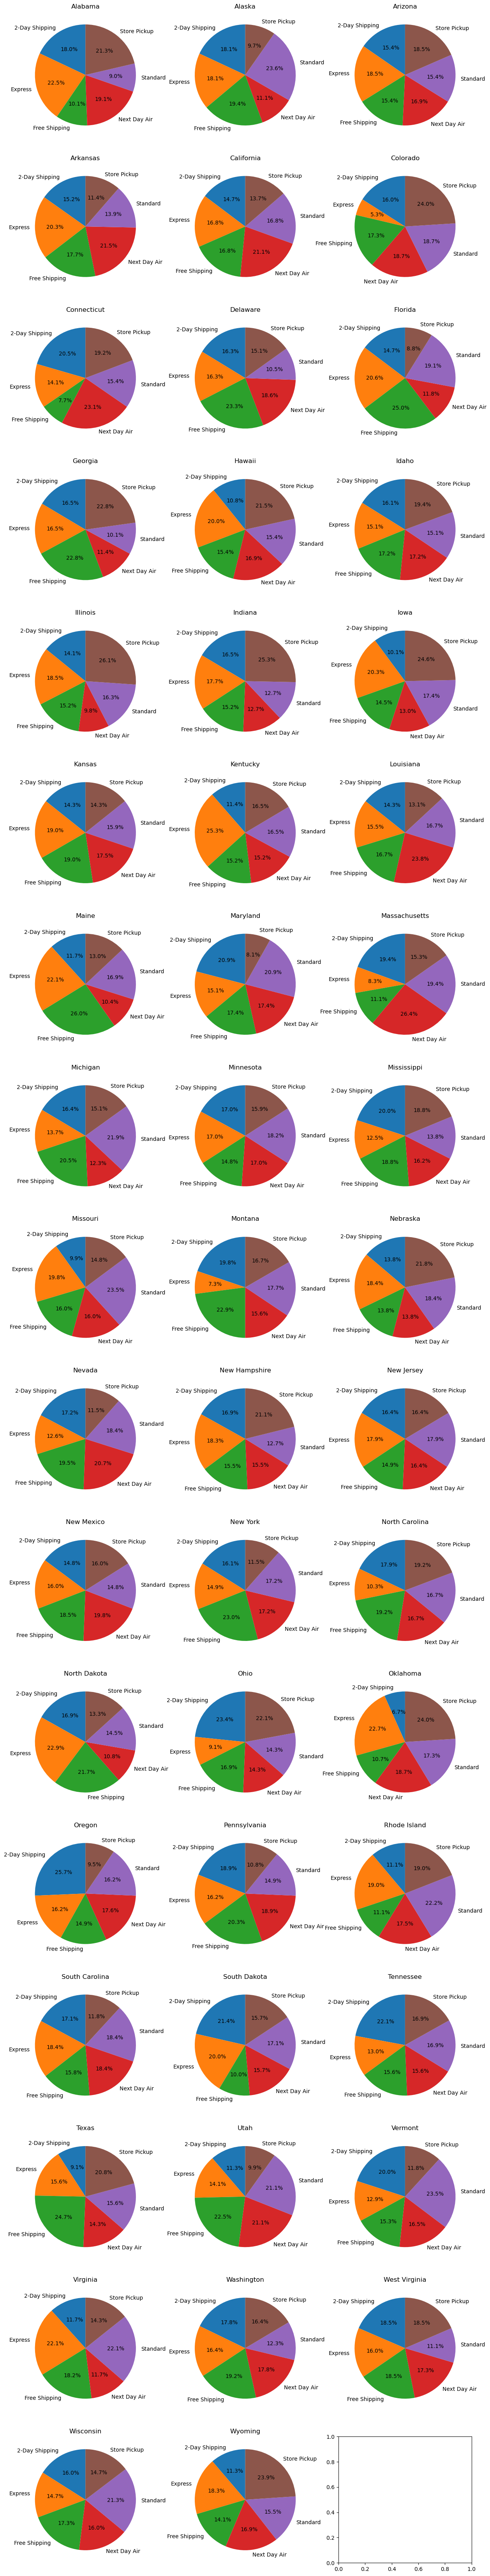

In [22]:
locations = location_shipping_counts.index.tolist()
num_cols = 3 
num_rows = (len(locations) - 1) // num_cols + 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
if len(locations) == 1:
    axes = [axes]
for i, location in enumerate(locations):
    ax = axes[i // num_cols][i % num_cols]
    shipping_counts = location_shipping_counts.loc[location]
    ax.pie(shipping_counts, labels=shipping_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(location) 
plt.show()

#### Conclusion for Question 1:
Indeed, the preference for shipping types can vary by location. With the charts presented above, entrepreneurs can leverage the provided data to select suitable partners, thereby optimizing business efficiency. This data-driven approach can lead to more informed decisions and potentially enhance the overall business performance.


### Question 2: How often is size chosen for each gender? <a name="subbody4-2"></a>

Let's look at the facts about men's and women's sizes. Clothing needs to consider size to be more suitable and appealing than other types of clothes. Businesses also need to know how much of each size is being purchased to avoid running out or having too much stock. This is important when there is high demand for a specific size, or when there is excess stock but not much interest in buying more.

To be able to draw graphs and analyze them, we need to preprocess a bit:
 - Step 1: Calculate the number of purchases by each gender and each size
 - Step 2: Create a column containing the number of purchases grouped based on each gender and size
 - Step 3: Perform pie chart visualization for analysis

In [23]:
size_counts = df.groupby(['Gender', 'Size']).size().reset_index(name='Count')
size_counts

,Gender,Size,Count
0,Female,L,337
1,Female,M,590
2,Female,S,187
3,Female,XL,134
4,Male,L,716
5,Male,M,1165
6,Male,S,476
7,Male,XL,295


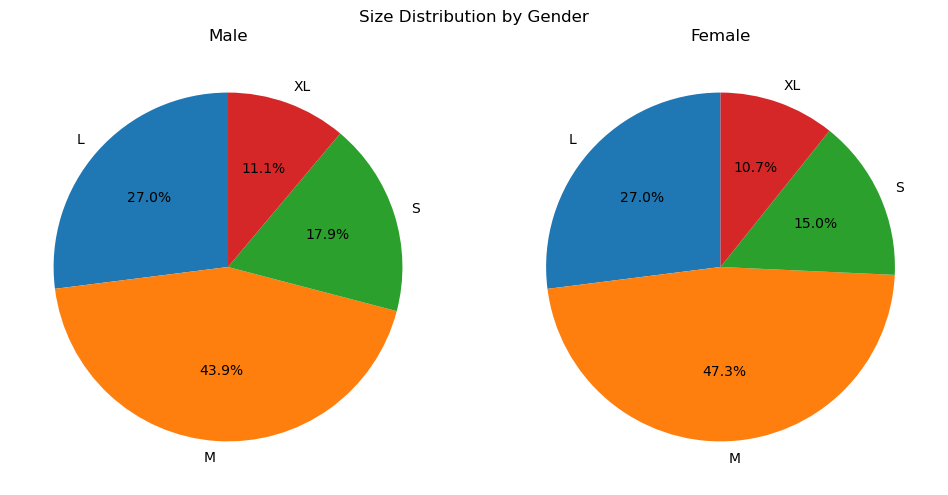

In [24]:
genders = df['Gender'].unique()
fig, axs = plt.subplots(1, len(genders), figsize=(10, 5))
for i, gender in enumerate(genders):
    gender_data = size_counts[size_counts['Gender'] == gender]

    sizes = gender_data['Size']
    counts = gender_data['Count']

    axs[i].pie(counts, labels=sizes, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(gender)

fig.suptitle('Size Distribution by Gender')
plt.tight_layout()
plt.show()

#### Conclusion for Question 2:
Based on the chart in the dataset, we can see a noticeable difference in the demand for men's sizes. Specifically, medium and small sizes (S, M, L) are much more popular than extra-large (XL) sizes. It's important to rely on carefully collected data rather than just traditional knowledge and experience in the business world. Having clear evidence, such as the chart mentioned earlier, is crucial for understanding market trends and making informed decisions.

### Question 3: What is the sales quantity of each category? <a name="subbody4-3"></a>

When analyzing the business market, the most important thing that cannot be ignored is revenue because the ultimate goal after analyzing and understanding market trends is how to optimize investment to achieve the highest revenue. So this is the question that needs to be asked and analyzed  data to answer accurately and clearly.

To analyze according to the given requirements, we need to process the data a bit:
 - Step 1: Count the total amount of purchase for each category
 - Step 2: Create a dataframe based on the calculated data
 - Step 3: Represent the data in the form of a bar chart

In [25]:
sales_per_category = df.groupby("Category")["Purchase_Amount_(USD)"].sum().sort_values()[::-1]
pd.DataFrame(sales_per_category)

,Purchase_Amount_(USD)
Category,
Clothing,104264
Accessories,74200
Footwear,36093
Outerwear,18524


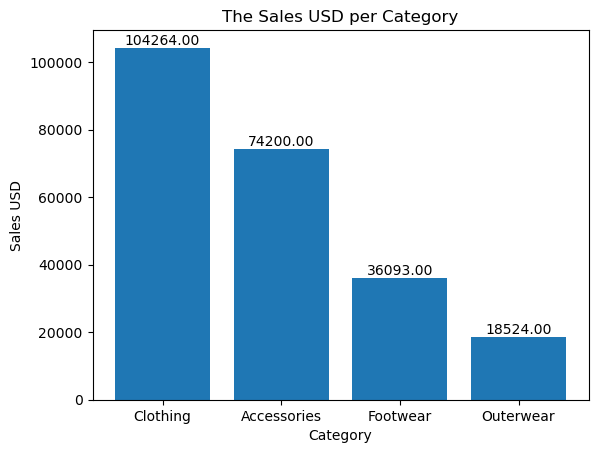

In [26]:
fig, ax = plt.subplots()
x = range(len(sales_per_category))
y = sales_per_category.values

ax.bar(x, y)

ax.set_xlabel("Category")
ax.set_ylabel("Sales USD")
ax.set_title("The Sales USD per Category")
ax.set_xticks(x)
ax.set_xticklabels(sales_per_category.index)

for i, value in enumerate(y):
    ax.text(i, value, f"{value:.2f}", ha="center", va="bottom")

plt.show()

#### Conclusion for Question 3:
Through the bar chart represented based on the data, we can analyze that clothing is the category that brings the highest revenue with a large difference compared to other categories. From there, enterprise can easily recognize and capture market trends to take advantage of and make decisions on the main business items to earn high revenue.

### Question 4: What is the popularity of each category following each season? <a name="subbody4-4"></a>

Capturing shopping trends is very important and not easy when it requires accurate information and continuous updates according to each time milestone such as each month, season and year,… Therefore, with the data collected from the dataset, we also have to analyze shopping trends based on each season to ensure that revenue is always at a good level, capture the market in detail and information is regularly updated.

These data have been well processed before, so we just need to process the data extraction to get the correct answer:
 - Step 1: We have to slice the necessary columns “Season” and “Category” in the dataframe.
 - Step 2: Count the number of categories for each season
 - Step 3: Represent the data with a bar chart

In [27]:
my_df = df[['Category', 'Season']]
grouped_by_df = my_df.groupby('Season')['Category'].value_counts()
grouped_by_df

Season  Category   
Fall    Clothing       427
        Accessories    324
        Footwear       136
        Outerwear       88
Spring  Clothing       454
        Accessories    301
        Footwear       163
        Outerwear       81
Summer  Clothing       408
        Accessories    312
        Footwear       160
        Outerwear       75
Winter  Clothing       448
        Accessories    303
        Footwear       140
        Outerwear       80
Name: Category, dtype: int64

<Figure size 1200x800 with 0 Axes>

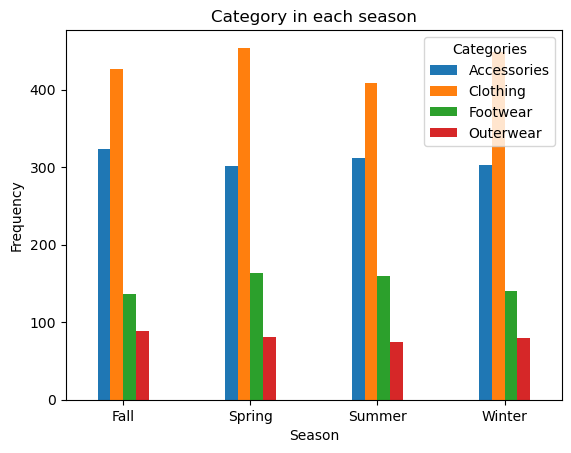

In [28]:
my_data = grouped_by_df.unstack()

plt.figure(figsize=(12, 8))
my_data.plot(kind='bar', width=0.4)
plt.title('Category in each season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Categories', loc='upper right')
plt.show()

#### Conclusion for Question 4:
Based on the bar chart data we have analyzed, we can see that clothing is consistently the most popular item for shoppers, regardless of the season. This indicates that the demand for clothing remains consistently high, and it should be a top priority for businesses. Additionally, the dataset also reveals that the demand for other items remains stable over time. This provides enterprises with a clear and detailed understanding, allowing them to create long-term plans that account for seasonal variations.

### Question 5: What is the review rating according to the value difference between the current purchase and the previous purchase? <a name="subbody4-5"></a>

Understanding consumer purchasing trends is important, but we must also consider customer reviews as they greatly influence whether customers will repurchase from us. Therefore, it is crucial to use customer reviews to improve our services, increase the likelihood of customers returning for future purchases, and boost our revenue growth. Additionally, we should pay attention to the level of customer satisfaction when they return to make a purchase, whether it has improved or declined compared to their previous experience. This rating helps us understand the mindset of customers and provides guidance for development and improvement. Analyzing this question is highly beneficial in gaining valuable insights.

To create a graph that contains the necessary data to answer the above question, we will perform the following steps:
 - Step 1: Extract the necessary columns such as “Purchase_Amount_(USD)” (current purchase), “Previous_Purchases” and “Review_Rating”.
 - Step 2: Create a new column named “Value_Difference” that contains the difference between the current purchase and the previous purchase.
 - Step 3: Create a new column named “Purchase_Increase” that contains binary values converted from the “Value_Difference” column, where “0” represents a decrease (negative number) and “1” represents an increase (positive number).
 - Step 4: Calculate the average of the review ratings grouped by the new “Purchase_Increase” column.
 - Step 5: Represent the average review rating of the difference value.

In [29]:
new_df = df[['Purchase_Amount_(USD)', 'Previous_Purchases', 'Review_Rating']].copy()

new_df['Value_Difference'] = new_df['Purchase_Amount_(USD)'] - new_df['Previous_Purchases']
new_df['Purchase_Increase'] = (new_df['Value_Difference'] > 0).astype(int)

new_df

,Purchase_Amount_(USD),Previous_Purchases,Review_Rating,Value_Difference,Purchase_Increase
0,53,14,3.1,39,1
1,64,2,3.1,62,1
2,73,23,3.1,50,1
3,90,49,3.5,41,1
4,49,31,2.7,18,1
...,...,...,...,...,...
3895,28,32,4.2,-4,0
3896,49,41,4.5,8,1
3897,33,24,2.9,9,1
3898,77,24,3.8,53,1


In [30]:
average_rating = new_df.groupby('Purchase_Increase')['Review_Rating'].mean()
average_rating

Purchase_Increase
0    3.720930
1    3.753954
Name: Review_Rating, dtype: float64

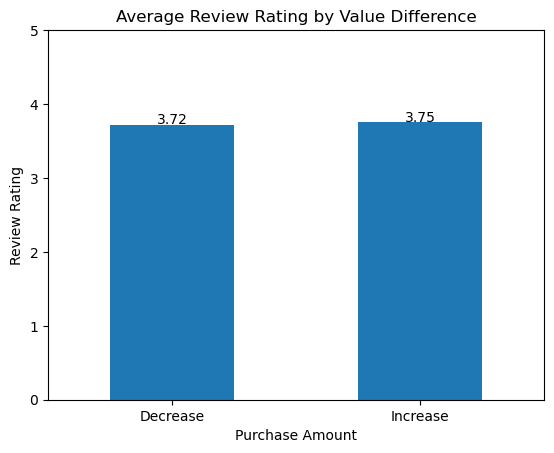

In [31]:
fig, ax = plt.subplots()
bar_plot = average_rating.plot(kind='bar')

for i, v in enumerate(average_rating):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')
    
tick_labels = ['Decrease', 'Increase']
plt.ylim(0, max(new_df['Review_Rating']))
plt.xlabel('Purchase Amount')
plt.ylabel('Review Rating')
plt.title('Average Review Rating by Value Difference')
plt.xticks(range(len(tick_labels)), tick_labels, rotation=0)
plt.show()

#### Conclusion for Question 5:
With just one question, the analysis brings a lot of meaning, not just one. As can be seen through the bar chart, the average value of the review rating based on the difference between the current purchase and the previous purchase does not vary much, meaning that whether the current purchase is lower or higher than the previous purchase does not significantly affect the consumer's rating after returning to make a purchase. Therefore, it can be seen that the trend of buying products is always stable, there are not too many changes to make users rate too good or too bad after returning to buy. However, it also reflects that the consumer's rating level is not high and needs to be improved more.

# 5. Reflection <a name="body4"></a>

### 5.1. Trần Quang An Quốc <a name="subbody4-1"></a>

**Difficulties**
1. To my point of view, it is difficult to find a subject which is not too much complex but to have enough information for us to explore.
2. As the data is generated from AI, it is not practical in some cases which leads to challenges to us to find the question to solve.
3. It takes me time to learn more about relevant library to solve the problem.

**What i have learn from the project**
1. Although i got trouble in finding syntax at the first time, i gained much knowledge from that.
2. I learned how to find the dataset on Kaggle.

**What to do next**
1. Explore more insights about data.
2. As a computer science student, I want to apply machine learning into prediction cases in the future.

### 5.2. Đỗ Đạt Thành <a name="subbody4-2"></a>

**Difficulties**

1.	The most challenging part is not solving or presenting the question, but finding a meaningful question that can be applied in reality.
2.	When posing a question, one must also consider whether they have sufficient data to solve and explain it.
3.	Processing and presenting data is not too easy for complex questions that require data to be processed through various steps.


**What i have learn from the project**

1.	How to pose meaningful questions. 
2.	How to process data before presenting it.
3.	How to read charts to understand the meaning of the data presented. Understanding the functions and usage of libraries like pandas, matplotlib.
4.	How to communicate and work effectively in a team, both directly and indirectly (remotely).


**What to do next**

1.	Deepen understanding of the functions provided by libraries for future application.
2.	Read more books to gain additional knowledge in studies and life, to be able to pose questions of high value and meaning.
3.	Learn more about ways to present and interpret charts to better understand data.


# 6. References <a name="reference"></a>

1. Documents of the subject [Programing For Data Science](https://drive.google.com/drive/folders/1FyzNTCs_xpx-CUVBw_VwXlEt73tf8ywX)
2. Pandas Documentation  [Pandas Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
3. Matplotlib documentation  [Matplotlib Guide](https://matplotlib.org/3.5.3/index.html) 
4. Customer Shopping Trends Dataset [Customer Shopping Trends Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset)